# Universitetet i Agder

November 2021

In [1]:
import dhlab.module_update as mu
import dhlab.nbtext as nb
mu.update('dhlab_v2', silent = True)
import pandas as pd
import dhlab_v2 as d2

In [105]:
mu.css('css.css')

In [3]:
def show_communities(G, size = 10):
    Gc = gnl.community_dict(G)
    for c in Gc:
        out = "**{name}**: {group}".format(name = c, group = ', '.join(Gc[c][:size]))
        mu.printmd(out)
              

# DH-lab - Nasjonalbiblioteket

DH - Digital Humanioria: interpretation and analysis of digital objects, texts, images and sound.


# For whom?

Everyone who wants to study texts.

SSB, UiO, OsloMet, Høgskulen i Volda, NTNU, Universitetet i Agder, UiB

One book, several articles, two PhDs and more.


# What is the virtual laboratory?

# API

## api.nb.no/dhlab/....

Feature sets and snippets (concordances)


# FAIR

Findable Accessible Interoperability Reusability

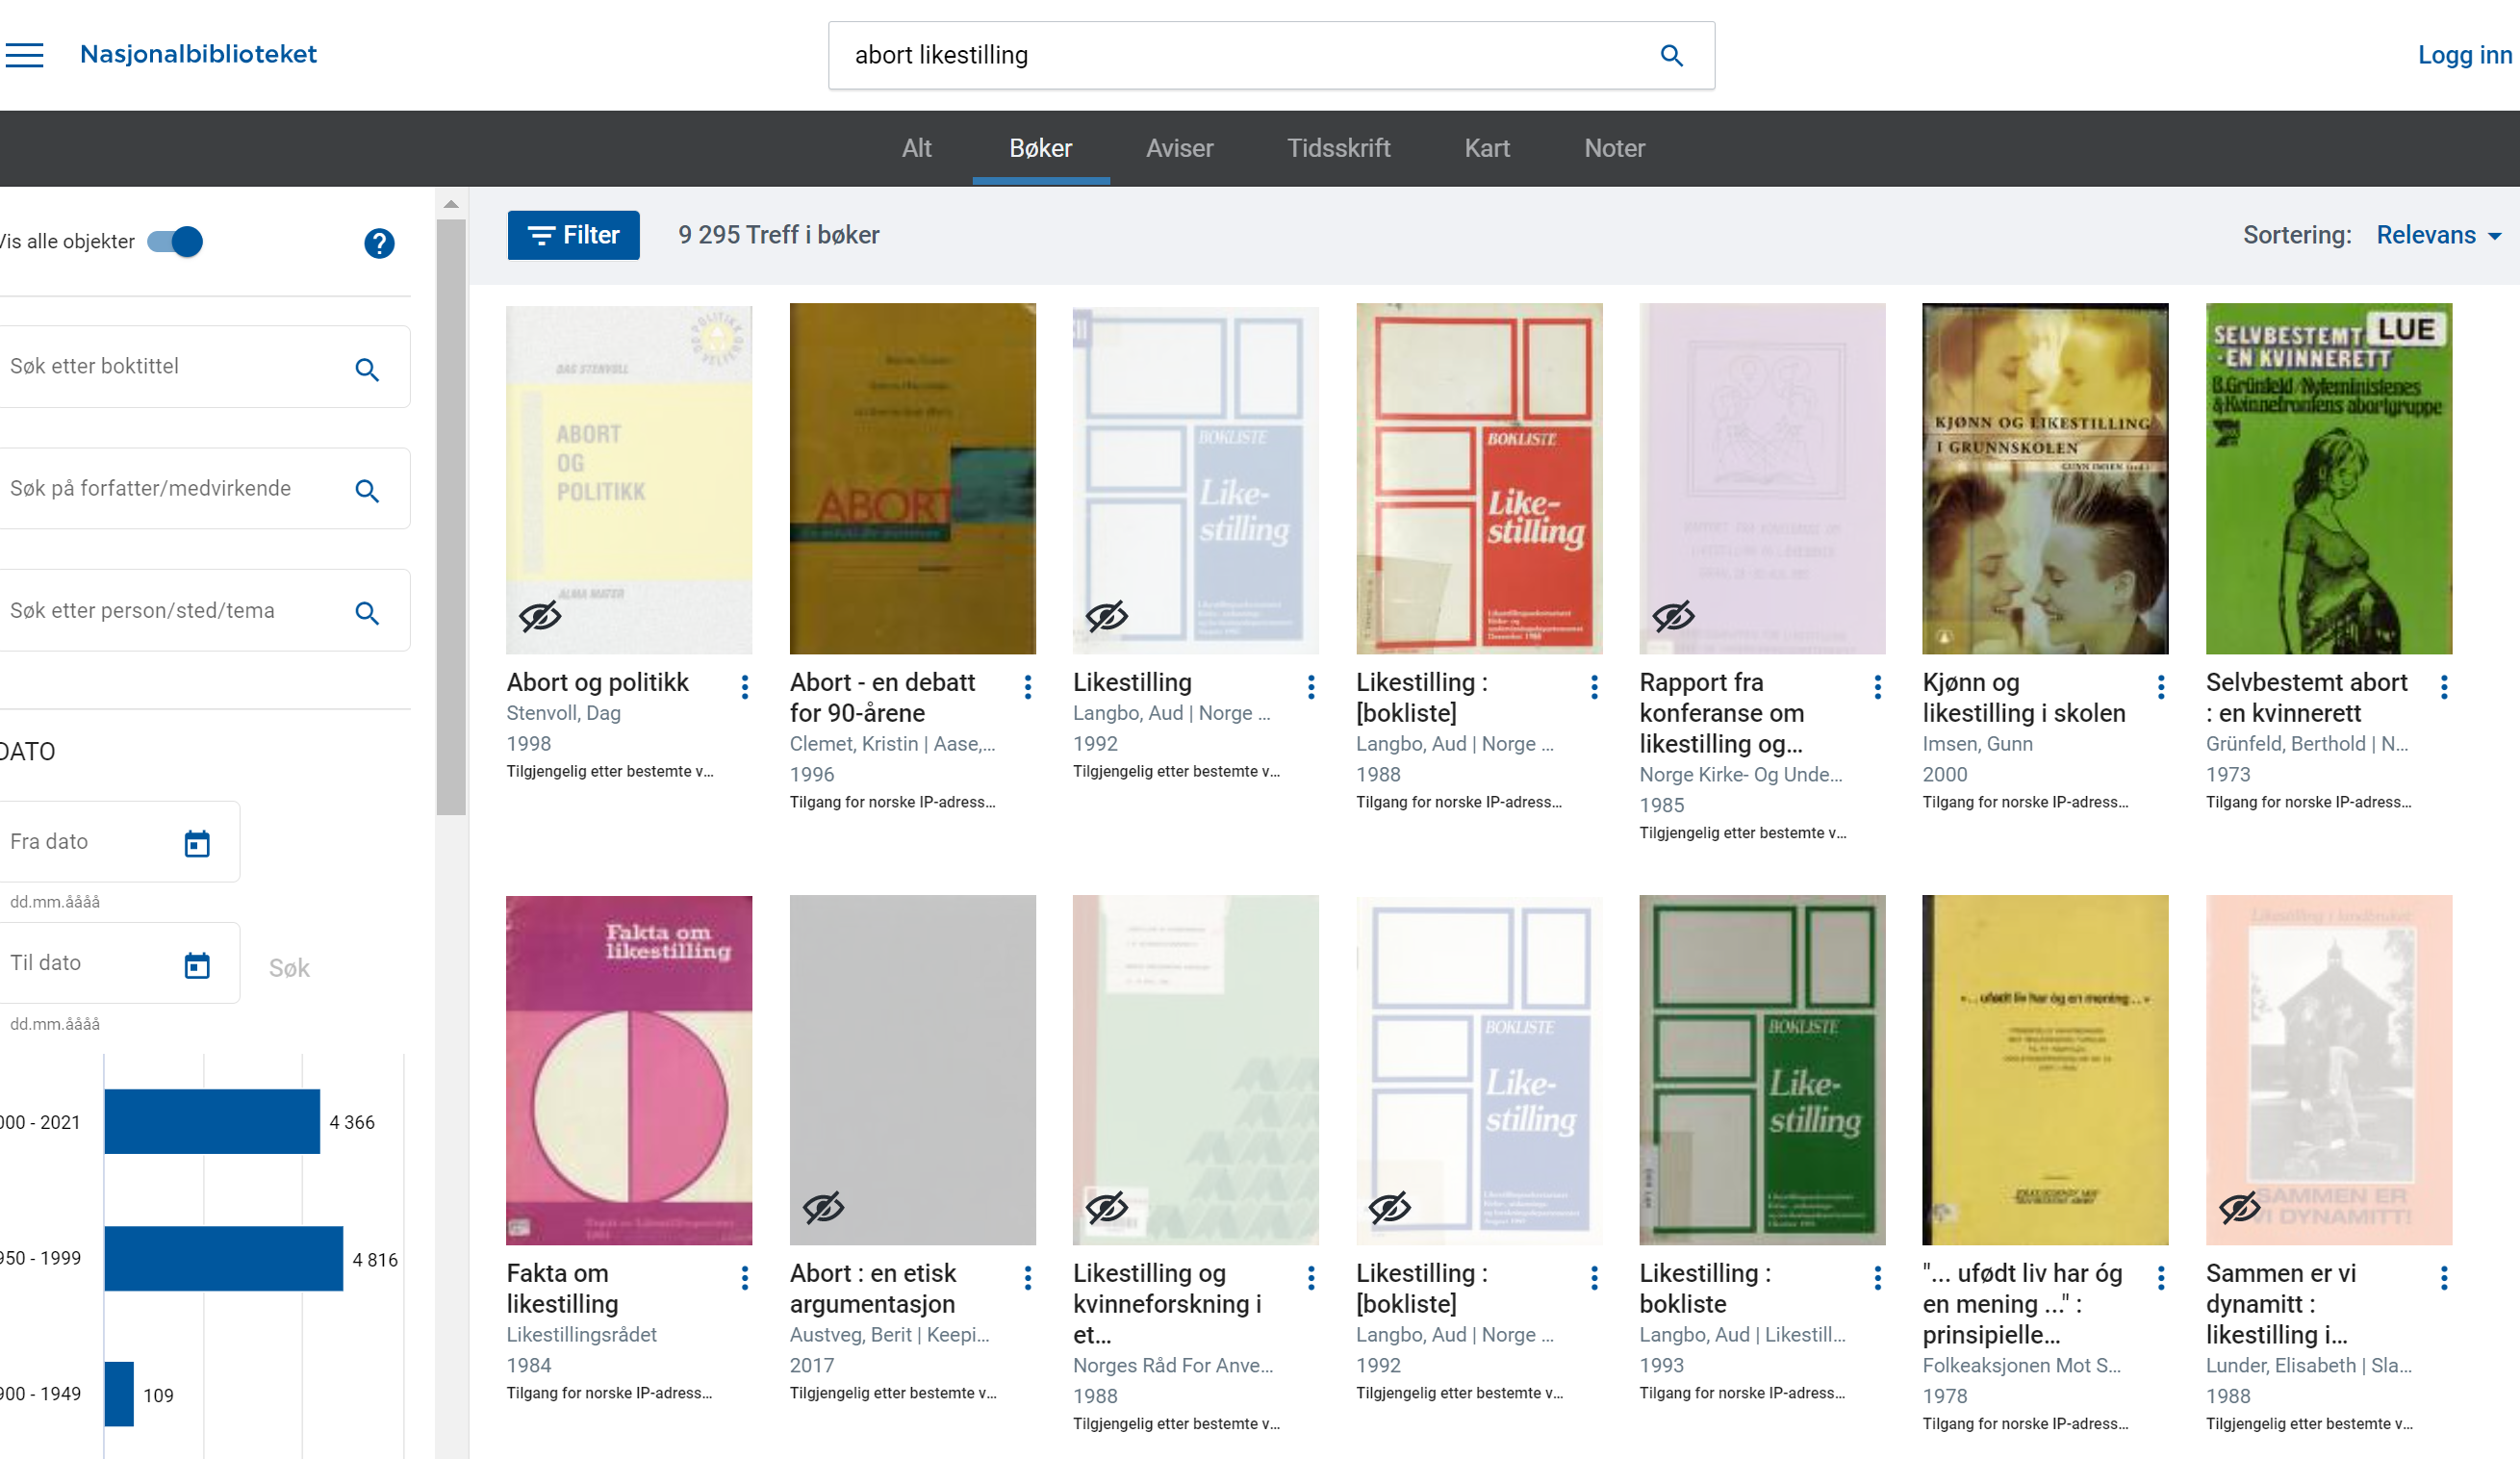

In [147]:
from IPython.display import Image
Image(filename="./illustrations/abort_likestilling_nbno.PNG")

## NB N-gram



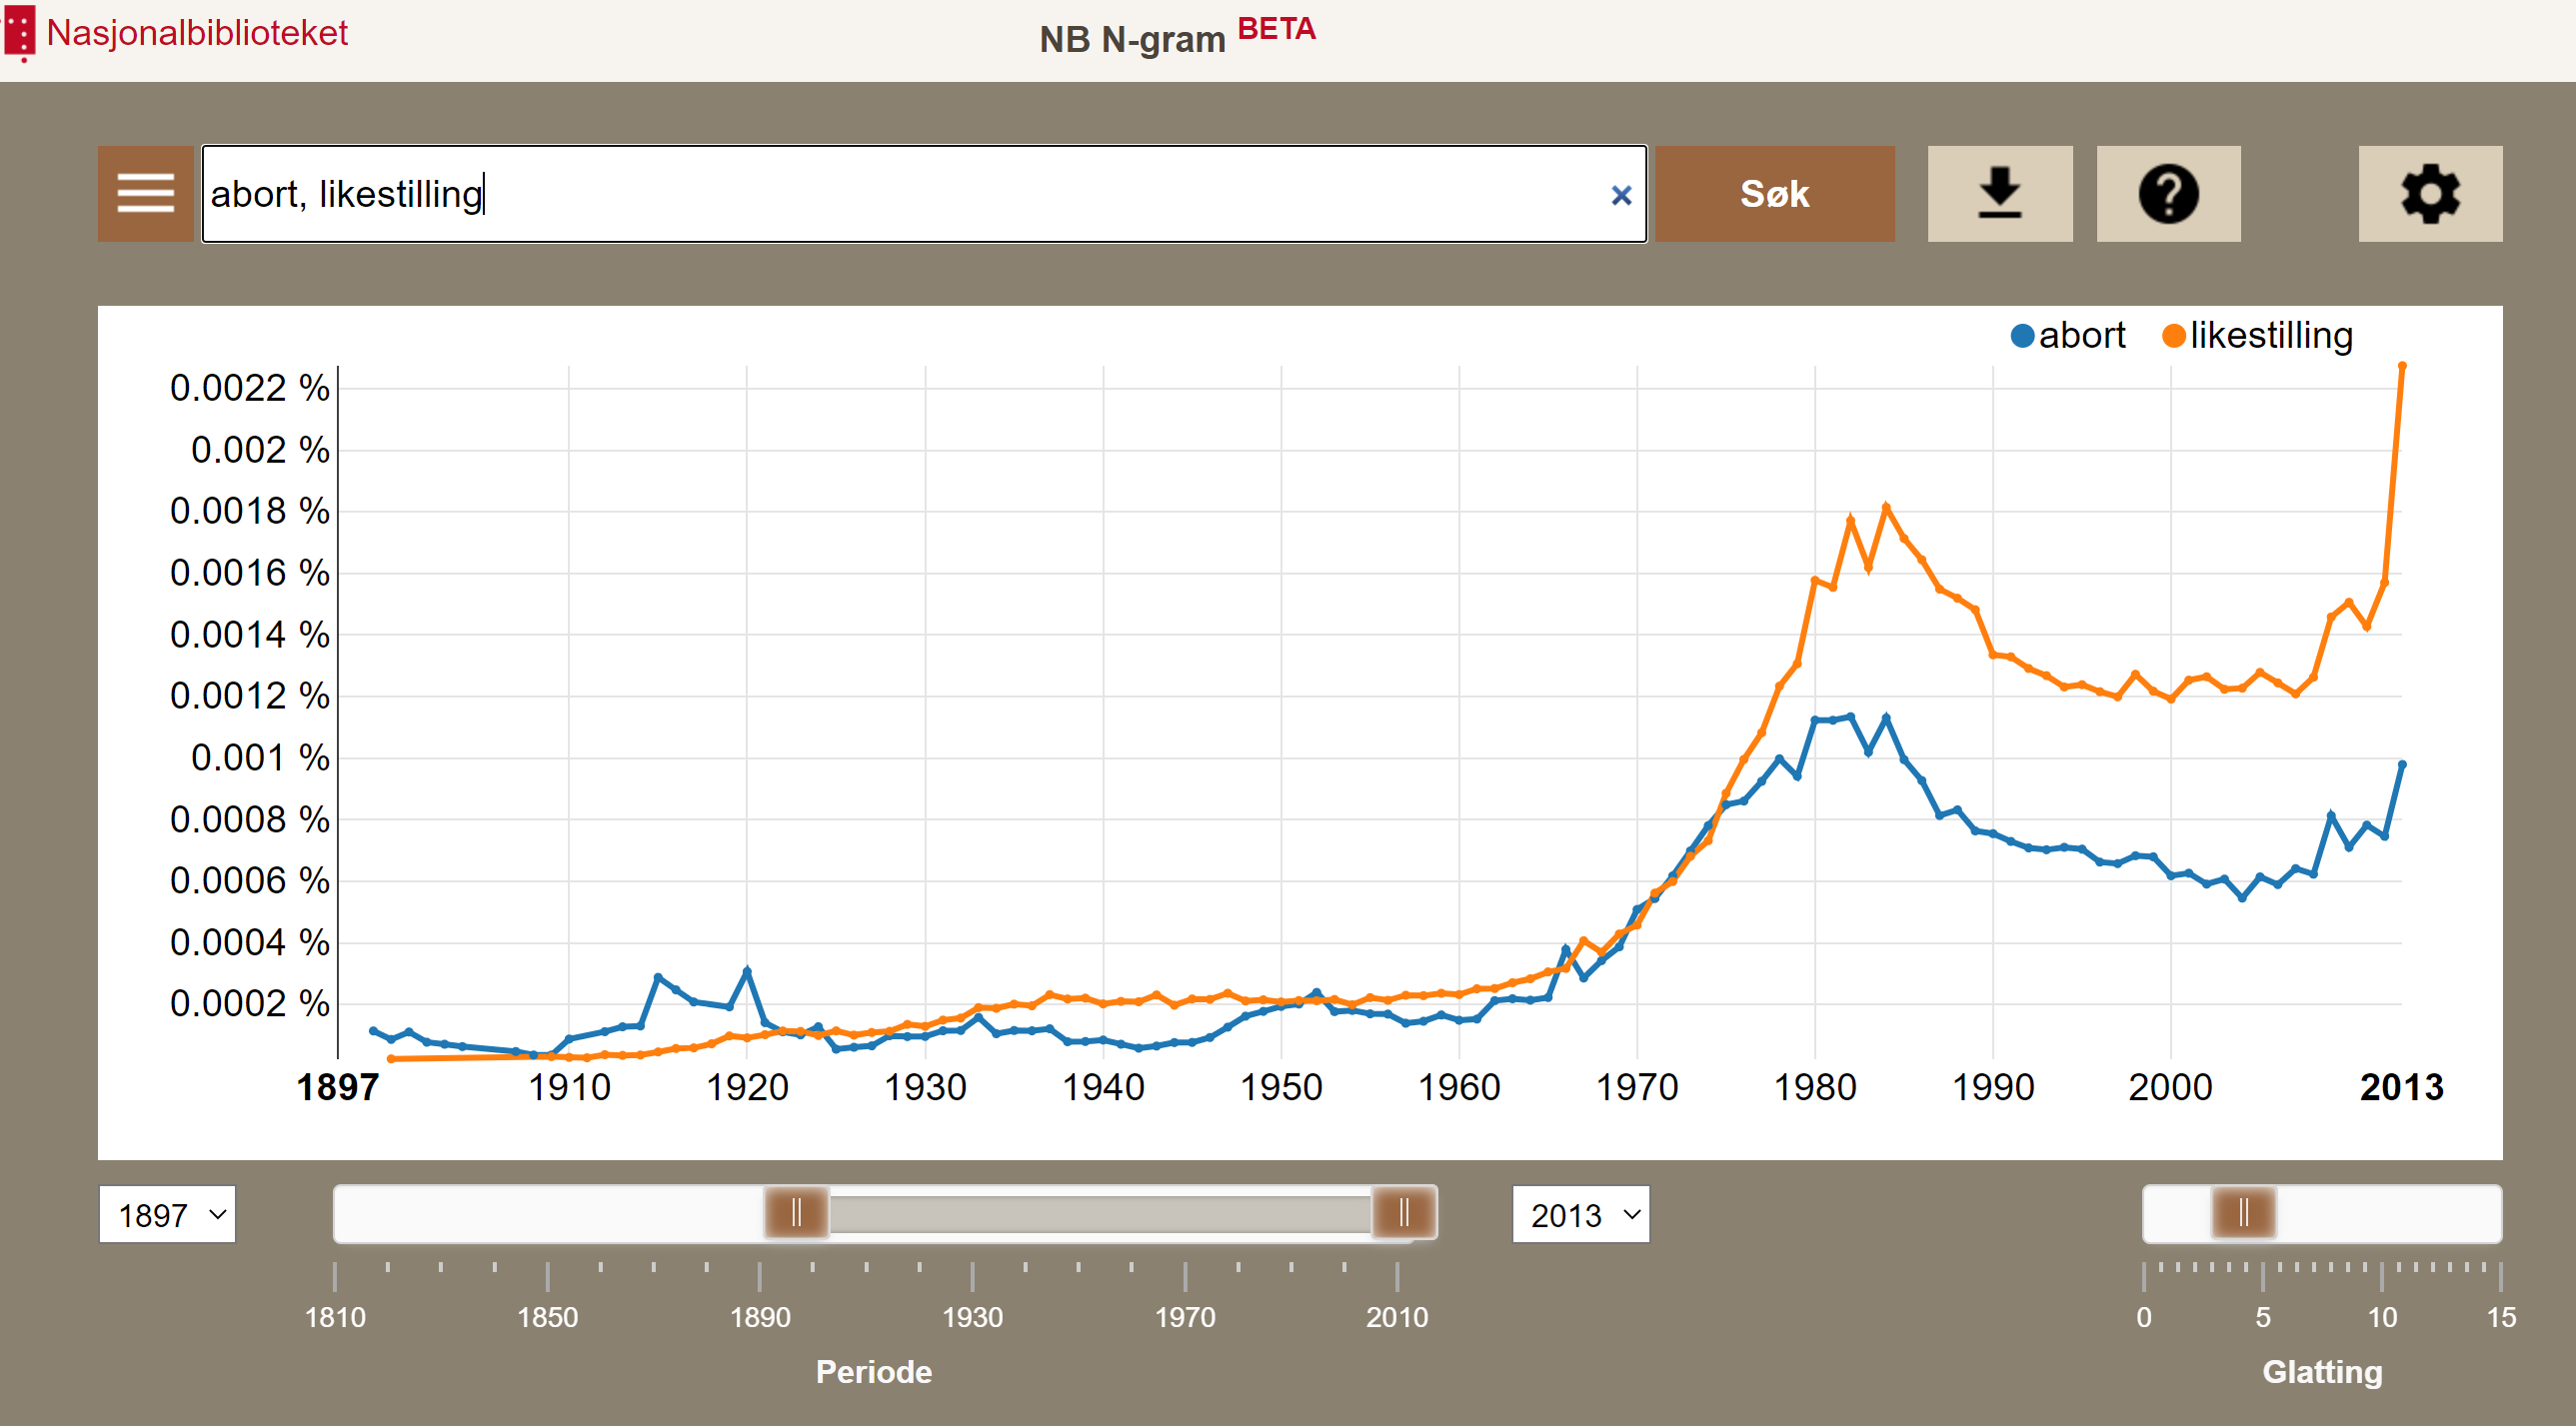

In [107]:
from IPython.display import Image
Image(filename="./illustrations/abort_likestilling.PNG")

## Within notebook

<AxesSubplot:>

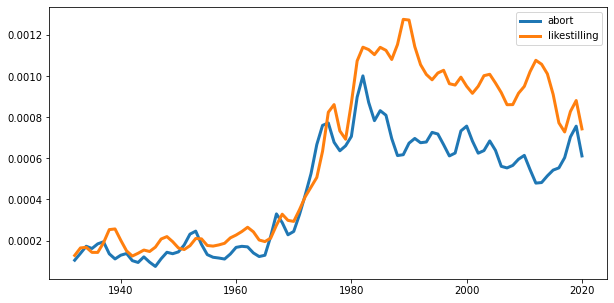

In [109]:
d2.nb_ngram('abort, likestilling', years = (1930, 2020)).sort_index().plot(figsize = (10, 5), lw = 3)

## Korpus 

A collection of references, or identifiers with information


In [113]:
word1 = 'abort'
word2 = 'likestilling'
corpus1 = d2.document_corpus(subject = word1, doctype = 'digibok', from_year = 1960, to_year = 1990, limit = 50, lang = 'nob')
corpus2 = d2.document_corpus(subject = word2, doctype = 'digibok', from_year = 1960, to_year = 1990, limit = 50, lang = 'nob')

c1_agg = d2.get_document_frequencies(list(corpus1.urn))
c2_agg = d2.get_document_frequencies(list(corpus2.urn))

combo = pd.concat([c1_agg.sum(axis = 1), c2_agg.sum(axis = 1)], axis = 1)
combo.columns = [word1, word2]

In [116]:
corpus1.sample(3)["urn title authors city year publisher subjects ddc literaryform".split()]

,urn,title,authors,city,year,publisher,subjects,ddc,literaryform
49,URN:NBN:no-nb_digibok_2014100608020,Med det femte bud på Dagsrevyen - Ludvig Nessa,"Hove , Odd Sverre",[Frekhaug],1989,Kefalé-forlaget,abort / biografi / kirkerett / kirkehistorie /...,274.81,Faglitteratur
46,URN:NBN:no-nb_digibok_2007071700032,"Ikke send meg til en ""kone"", doktor : fra 3 år...","Aanesen , Ellen",Oslo,1981,Oktober,"Abortion, Legal / history / Abortion, Criminal...",179 / 301.412 / 362.1988809481,Faglitteratur
2,URN:NBN:no-nb_digibok_2007070401102,Manipulering med arvestoffet : etiske og human...,"Åhman , Brita / Larsen , Finn B.",[Oslo],1982,Dreyer,"Ethics, Medical / Genetics / Cloning, Molecula...",573 / 174,Faglitteratur


In [124]:
combo.head(5)

,abort,likestilling
",",107751.0,74448.0
.,140275.0,95531.0
og,66895.0,55323.0
er,42323.0,34700.0
i,58488.0,53550.0


In [123]:
(combo.loc["familie samliv arbeid frihet feminisme".split()]*100).fillna(0).sort_values(by = word1, ascending = False).style.background_gradient(axis = 1)

,abort,likestilling
arbeid,77000.000000,255500.000000
familie,37800.000000,42500.000000
frihet,26500.000000,15000.000000
samliv,16500.000000,3800.000000
feminisme,1200.000000,1500.000000


# Keyness

In [102]:
assoc = lambda agg: (agg.counts/agg.counts.sum())/(tot.freq/tot.freq.sum())

In [68]:
ref = d2.get_reference(corpus = 'digibok', from_year = 1960, to_year = 1990)

In [125]:
keyness = pd.concat([combo[word1]/(ref.freq/ref.freq.sum()), combo[word2]//(ref.freq/ref.freq.sum())], axis = 1)

In [126]:
keyness.columns = [word1, word2]

In [145]:
keyness.sort_values(by = word2, ascending = False).head(10)

,abort,likestilling
Likestillingsombudet,3.663648e+06,765702428.0
Ombudet,6.367594e+06,730150764.0
kvotering,NaN,688933877.0
likestillingsloven,5.126619e+06,553674800.0
Klagenemnda,9.640475e+06,552720575.0
kvinneandelen,NaN,426109002.0
jentenes,9.110332e+06,377572654.0
særbehandling,8.241779e+06,370880058.0
kjønnskvotering,NaN,341361809.0
jenters,NaN,333442549.0


In [146]:
keyness.sort_values(by = word1, ascending = False).head(10)

,abort,likestilling
Larch,5.282980e+09,NaN
Nessa,3.853909e+09,NaN
svangerskapsavbrudd,1.845526e+09,25915110.0
aborter,1.003272e+09,12827215.0
selvbestemt,9.386694e+08,22026537.0
Wally,9.095206e+08,946431.0
Homer,8.358504e+08,894914.0
abort,7.817952e+08,11394987.0
Worthington,6.992180e+08,NaN
svangerskapsuke,6.794168e+08,8235355.0


In [148]:
conc = d2.Concordance(corpus1, 'Larch')

In [149]:
conc.show(10)

,link,concordance
830,URN:NBN:no-nb_digibok_2007091001039,Min kjære Homer ( skrev dr. Larch i et brev som gikk med posten dagen etter ) .
942,URN:NBN:no-nb_digibok_2007091001039,"... Larch hjalp ham med å laste av trærne . « De er litt spinkle , er de ikke ? » spurte Larch . « De kommer ikke til å gi noe særlig..."
351,URN:NBN:no-nb_digibok_2007091001039,"... natt , dere prinser av Maine — dere konger av New England ! » sa dr. Larch til dem i mørket . Så husket han det som det ble ventet..."
448,URN:NBN:no-nb_digibok_2007091001039,... hadde aldri vært noen alvorlige komplikasjoner i kjølvannet til de abortene dr. Larch hadde foretatt og ingen varige men etter operasjonene — hvis det ikke hadde...
332,URN:NBN:no-nb_digibok_2007091001039,"... Larch innbilte seg at Melony hadde på Homer , ble oppveid av et grep Homer hadde på Melony ( Homers løfte til henne som Larch ikke kunne..."
1097,URN:NBN:no-nb_digibok_2007091001039,... Brevet fra søster Caroline var også kommet fram . Det lå og ventet på ham sammen med brevet fra dr. Larch og et brev fra Melony .
807,URN:NBN:no-nb_digibok_2007091001039,"« Hvilket samfunn ? » skrek Wilbur Larch . Han sto ved vinduet i søster Angelas kontor og stirret på den nakne åssiden , der Wally hadde villet plante epletrær..."
269,URN:NBN:no-nb_digibok_2007091001039,"... og redskap til mindre kirurgiske inngrep skulle oppta mesteparten av midtrommet , men Larch hadde andre grunner for å innrede rommet på den måten . Skaplabyrintene midt..."
974,URN:NBN:no-nb_digibok_2007091001039,"... Det var det som var feilen ved Larch . Hun innrømmet at ikke alle som var nittietellerannet var senile , men Larch var ikke normal . Og selv..."
675,URN:NBN:no-nb_digibok_2007091001039,"... Han bedyret at Melony ikke var noen liten pike . « Hun er tjuefire eller tjuefem år gammel , » minnet Larch Mrs . Grogan på ."
